In [35]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import seaborn as sns

In [57]:
import pandas as pd

RANDOM_STATE = 42
FILE_PATH = "../Data/patient_genes_research_BORUTA_KEVINKEVIN.csv" # Can be replaced with desired variant for different feature sets
variant = 'svm'
df = pd.read_csv(FILE_PATH)

#df.info()

In [58]:
targetGenes = [ 'A2M', 'ABCA1',  'ACKR1', 'ACSL3', 'ACTG2', 'ADH1B', 'ADH1C', 'AHR', 'AK5', 'AKT1', 'AKT2', 'AKT3', 
                'ALDH1A1', 'ALOX12B', 'AOC3', 'APOE', 'AR', 'ARID1B', 'ARNT', 'ASAH1', 'ASPSCR1', 'ASXL1', 
                'ASXL2', 'ASXL3', 'ATM', 'BCL9', 'BIRC3', 'BIRC6', 'BRCA1', 'BRCA2', 'BRD4', 'BTN3A1', 'CANT1', 'CCL4', 
                'CCND1', 'CCNE1', 'CCNT1', 'CD14', 'CTLA4', 'CD163', 'CD19', 'CD1A', 'CD1B', 'CD1C', 'CD1D', 'CD1E', 'CD24', 
                'CD27', 'CD274', 'CD276', 'CD3D', 'CD4', 'CD44', 'CD68', 'CD79A', 'CD86', 'CD8A', 'CD8B', 'CDH1', 
                'CDH2', 'CDH3', 'CDH5', 'CDK1', 'CDK2', 'CDK4', 'CDK6', 'CDKN1B', 'CDKN2A', 'CDKN2B', 'CEACAM7', 'CHAD',
                'CHEK2', 'CKB', 'CLEC3A', 'COL1A1', 'COL1A2', 'COPZ2', 'COX7A1', 'CREBBP', 'CRYAB', 'CSF2RB', 'CSMD3', 'CTLA4',
                'CTSD', 'CX3CR1', 'CXCL8', 'CXCR2', 'CXCR4', 'CYP1A1', 'DCLK1', 'DDR2', 'DDX3X', 'DEFB132', 'DNAH7', 'DNMT1', 
                'DNMT3A', 'DOCK11', 'DST', 'EDNRB', 'EGFR', 'EPCAM', 'ERBB2', 'ESR1', 'ESR2', 'EZH2', 'FAT1', 'FBXW7',
                'FCGR2B', 'FGA', 'FGB', 'FGFR1', 'FGFR2', 'FGFR4', 'FGG', 'FOXA1', 'FOXC1', 'FOXP3', 'FYN', 'GAS1', 'GATA3',
                'GIMAP7', 'GJA1', 'GJA4', 'GLDC', 'GNG11', 'GNLY', 'GPLD1', 'GPX4', 'GSTA2', 'GZMB', 'GZMB', 'HCLS1', 'HLA-E',
                'HSP90AA1', 'HSP90AB1', 'HSP90B1', 'HSPA5', 'ID4', 'IDO1', 'IFNG', 'IGF1', 'IL18', 'IL2RA', 'IL2RB',
                'IL2RG', 'IL6', 'IL7R', 'INMT', 'INPP4B', 'ITGAX', 'JCHAIN', 'KIT', 'KMT2D', 'KRT13', 'KRT14', 'KRT15', 'KRT18', 
                'KRT36', 'KRT43P', 'KRT5', 'KRT6A', 'KRT6B', 'KRT8', 'LAG3', 'LAMA2', 'LAMC2', 'LCP2', 'LMNA', 'LPA', 'LRPPRC', 
                'MALAT1', 'MAOA', 'MAP2K4', 'MAP3K1', 'MDGA2', 'MDM2', 'MET', 'MKI67', 'MS4A1', 'MSLN', 'MTOR', 'MUC1', 'MUC16', 
                'MYB', 'MYC', 'NF1', 'NKG7', 'NME1', 'NOP16', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'NOTCH4', 'NPR1', 'OBSCN', 'OGN',
                'OLAH', 'P4HA3', 'PALB2', 'PCDH15', 'PCK1', 'PDCD1', 'PDCD1LG2', 'PDE2A', 'PDGFRA', 'PDGFRB', 'PECAM1', 'PGF',
                'PGF', 'PGR', 'PHLDA2', 'PIK3CA', 'PIK3R1', 'PIP', 'PKN1', 'PMS1', 'POSTN', 'PRKD2', 'PRR4', 'PTEN', 'PTK6', 
                'PTPRH', 'RACGAP1', 'RAD17', 'RAD51C', 'RB1', 'RDH12', 'RNF213', 'ROR1', 'RYR1', 'S100A16', 'SDS', 'SELL', 
                'SERPINA9', 'SNAI1', 'SNRNP200', 'SOD3', 'SPARCL1', 'SPTA1', 'SRC', 'SRD5A2', 'SREBF1', 'SRSF1', 'STAT1',
                'STAT2', 'STAT3', 'STAT5A', 'SYNE1', 'TACSTD2', 'TAT', 'TBC1D1', 'TBC1D22B', 'TBC1D31', 'TBC1D7', 'TFF1', 
                'TGFB1', 'TGFB2', 'TGFB3', 'TH', 'THBD', 'TIGIT', 'TOP1', 'TOP2A', 'TP53', 'TRAP1', 'TRDC', 'TRGC1', 'TRGC2',
                'TRIM29', 'TTN', 'TYMS', 'UBE2C', 'USP6NL', 'VAV3', 'VEGFA', 'VEGFB', 'VEGFC', 'VEGFD', 'VIM', 'VRK1', 'VTCN1',
                'VWF', 'WNT16', 'WTAP', 'XBP1', 'XCL1', 'XCL2', 'YES1', 'YOD1' ]

In [59]:
%run "..\Model\DataHelpers.ipynb"

In [60]:
df.drop(columns='case_id', inplace=True)

In [61]:
X_log.columns

Index(['WNT16', 'COPZ2', 'CREBBP', 'CEACAM7', 'CD4', 'FYN', 'BRCA1', 'IGF1',
       'BIRC3', 'VIM',
       ...
       'KRT43P', 'NME1', 'INMT', 'GSTA2', 'ADH1C', 'MALAT1', 'PECAM1', 'CD24',
       'CCL4', 'SRD5A2'],
      dtype='object', length=286)

In [62]:
X_log[targetGenes].columns

Index(['A2M', 'ABCA1', 'ACKR1', 'ACSL3', 'ACTG2', 'ADH1B', 'ADH1C', 'AHR',
       'AK5', 'AKT1',
       ...
       'VRK1', 'VTCN1', 'VWF', 'WNT16', 'WTAP', 'XBP1', 'XCL1', 'XCL2', 'YES1',
       'YOD1'],
      dtype='object', length=289)

In [63]:
#list(set(X_log.columns.tolist()) - set(targetGenes))
#list(set(targetGenes) - set(X_log.columns.tolist()))

In [64]:
import numpy as np
X_log = df.copy(deep=True)
y = df['tnbc'].copy(deep=True)
X_log.drop(columns='tnbc', inplace=True)
X_log
X_log= (X_log + 1).transform(np.log)

# print(len(targetGenes))
# print(len(X_log.columns.tolist()))

#X_log

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_logScaled = scaler.fit_transform(X_log)

In [66]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(X_logScaled)

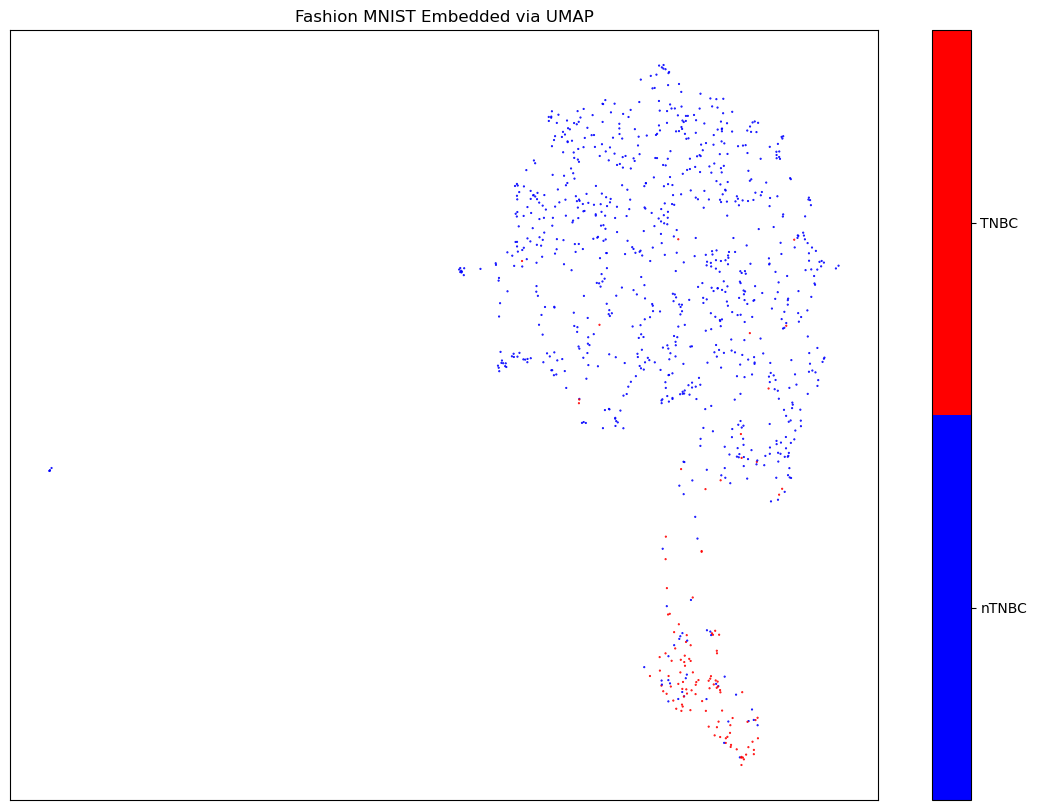

In [67]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=y, cmap='bwr', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(['nTNBC', 'TNBC'])
plt.title('Fashion MNIST Embedded via UMAP');

In [68]:
embedding = umap.UMAP().fit_transform(X_logScaled, y=y)

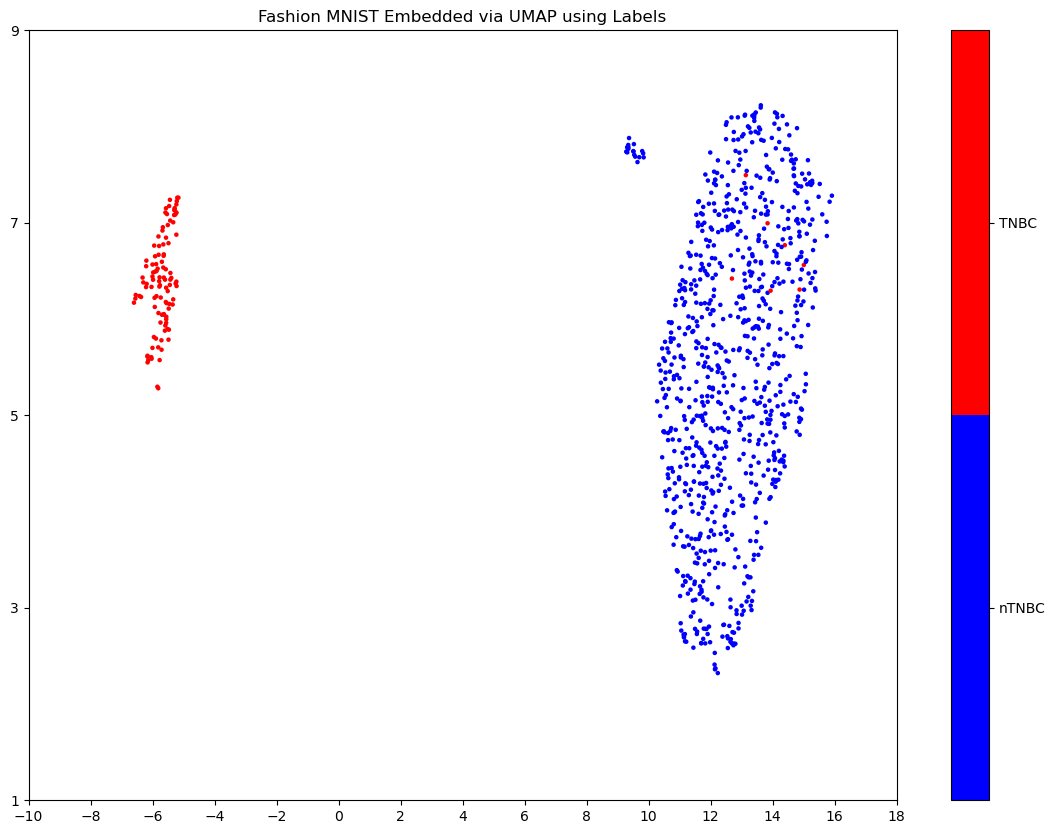

In [90]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=5, c=y, cmap='bwr', alpha=1.0)
plt.setp(ax, xticks=np.arange(-10, 20, 2), yticks=np.arange(1, 10, 2))
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(['nTNBC', 'TNBC'])
#plt.gca().set_aspect('equal', 'datalim')
plt.title('Fashion MNIST Embedded via UMAP using Labels');

array([10.628134 , 13.310971 , 13.001431 , 13.099964 , 12.264334 ,
       13.500463 , 13.376638 , 11.556921 , 12.459596 , 13.103012 ,
       13.140442 , 13.868266 , 12.565736 , 12.294639 , 13.483103 ,
       13.091263 , -5.561885 , 11.906505 , 12.047332 , -5.5747566,
       11.456748 , 12.061659 , 10.727549 , -5.8184767, 11.877692 ,
       11.949282 , 15.091508 , 12.495284 , 13.965893 , 15.174814 ,
       -5.9801865, 14.4942875, 13.285466 , 11.033733 , 15.069457 ,
       11.613084 , 11.547186 , 12.724453 , 13.751671 , 11.595681 ,
       12.094533 , 11.428069 , 14.306502 , -5.9300437, 11.709725 ,
       -5.8750787, 12.361129 , 10.529533 , 11.206318 , 14.69081  ,
       13.717395 , 14.68446  , 15.362064 , 11.057922 , 13.837106 ,
       11.172746 , 11.705637 , 12.640513 , 13.978951 , 13.466086 ,
       12.314812 , 13.507549 , 12.137466 , 15.015838 , -5.431278 ,
       14.126155 , -5.57295  , 15.103702 , -6.004618 , 12.404436 ,
       13.6371   , 12.504895 , 13.875679 , 13.088712 , 12.7024

In [75]:
print(df_embedded.min())
print(df_embedded.max())
print(df_embedded.mean())

UMAP1           -7.22099
UMAP2            0.61861
OriginalIndex    0.00000
dtype: float64
UMAP1             13.069160
UMAP2             15.939019
OriginalIndex    976.000000
dtype: float64
UMAP1              7.809383
UMAP2              5.021949
OriginalIndex    488.000000
dtype: float64


In [82]:
print(embedding.min())
print(embedding.max())
print(embedding.mean())

-6.6014314
15.913208
8.1425295


In [91]:
selected_indices = (embedding[:, 0] >= -8) & (embedding[:, 0] <= -4) & \
                   (embedding[:, 1] >= 5) & (embedding[:, 1] <= 8)
selected_data = X_log.loc[selected_indices]

In [93]:
selected_indices
selected_data

,WNT16,COPZ2,CREBBP,CEACAM7,CD4,FYN,BRCA1,IGF1,BIRC3,VIM,...,KRT43P,NME1,INMT,GSTA2,ADH1C,MALAT1,PECAM1,CD24,CCL4,SRD5A2
16,3.367296,4.043051,8.143227,1.386294,5.638355,8.061487,7.551712,2.197225,5.129899,9.024011,...,0.000000,6.533789,1.386294,0.000000,2.995732,7.684324,7.238497,9.989757,3.784190,2.197225
19,1.098612,5.351858,8.058960,0.693147,7.823646,7.497762,7.000334,5.484797,8.171882,10.409672,...,0.693147,6.222576,3.555348,3.044522,2.890372,7.732808,8.145260,10.799208,5.676754,0.693147
23,1.098612,5.252273,6.888572,0.000000,5.834811,6.386879,7.232010,3.970292,5.043425,10.642229,...,0.693147,7.604396,2.302585,0.000000,0.000000,7.608871,7.233455,8.672657,3.218876,0.693147
30,1.609438,5.351858,7.978996,1.098612,7.648740,6.563856,6.297109,6.473891,7.433075,10.158827,...,0.000000,6.276643,2.708050,0.000000,1.386294,8.327726,8.084254,11.229859,5.730100,1.609438
43,0.693147,4.406719,7.742836,0.693147,7.174724,5.966147,6.469250,2.564949,6.373320,11.139003,...,0.000000,7.364547,2.564949,3.610918,0.000000,7.172425,6.606650,7.740664,5.624018,2.564949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,2.639057,5.164786,7.379632,3.555348,8.186743,7.163172,4.997212,5.323010,7.461066,10.294042,...,0.000000,5.869297,4.634729,1.609438,5.940171,9.527775,7.996317,9.872616,5.814131,3.091042
928,1.609438,6.576470,8.381373,0.693147,7.643962,7.423568,5.765191,6.685861,7.680637,10.823511,...,0.000000,5.609472,3.871201,0.000000,1.791759,8.619569,8.590815,10.390809,5.666427,1.386294
951,1.609438,4.532599,7.940228,0.693147,7.141245,7.128496,7.304516,4.897840,6.447306,10.487155,...,0.000000,7.292337,3.806662,0.000000,0.693147,8.119696,7.667158,11.271134,5.605802,1.609438
961,1.098612,4.634729,7.765569,1.098612,8.357494,7.099202,6.957497,4.317488,8.391857,10.380622,...,0.000000,6.845880,2.197225,0.000000,0.693147,7.698936,8.192294,8.988196,7.008505,2.397895


977

In [131]:
feature_names=X_log.columns
df_umap = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
df_features = pd.DataFrame(X_logScaled, columns=feature_names)  # Ensure feature names are available

correlations = df_features.corrwith(df_umap['UMAP1'])
print(correlations.sort_values(ascending=False))
print(type(correlations))
print(correlations['FOXA1'])
cDF = correlations.to_frame()
cDF['feature_index'] = range(0, len(cDF))

print('kevin' + str(cDF.loc['FOXA1']['feature_index']))

FOXA1    0.651260
ESR1     0.611269
TFF1     0.602639
AR       0.583073
GATA3    0.570503
           ...   
MSLN    -0.414064
MDGA2   -0.422129
OLAH    -0.478023
CCNE1   -0.512141
FOXC1   -0.531125
Length: 286, dtype: float64
<class 'pandas.core.series.Series'>
0.6512603171534972
kevin103.0


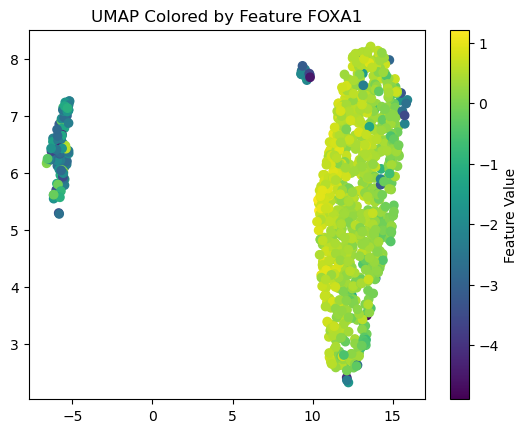

In [135]:
selectedFeature = int(cDF.loc['FOXA1']['feature_index'])

plt.scatter(embedding[:, 0], embedding[:, 1], c=X_logScaled[:, selectedFeature], cmap='viridis')
plt.colorbar(label='Feature Value')
plt.title(f'UMAP Colored by Feature {feature_names[selectedFeature]}')
plt.show()

In [49]:
df_embedded = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
df_embedded['OriginalIndex'] = np.arange(len(X_logScaled))

In [50]:
df_embedded

,UMAP1,UMAP2,OriginalIndex
0,8.123138,1.893621,0
1,11.369000,4.992570,1
2,11.276345,1.932435,2
3,9.983820,3.586418,3
4,9.889916,2.474707,4
...,...,...,...
972,11.337396,1.900371,972
973,10.009630,5.939550,973
974,10.533939,4.767505,974
975,11.548238,4.314559,975


In [109]:
# Features: all columns except target column
X = df.drop(columns=['tnbc', 'case_id'])
# Target variable
y = df['tnbc']

In [111]:
len(X)

977

In [112]:
import numpy as np
X_log = X.copy(deep=True)
X_log[targetGenes] = (X_log[targetGenes] + 1).transform(np.log)
X_log

,FYN,BRCA1,FOXC1,TBC1D1,LAG3,CDK6,GATA3,CCND1,PRR4,EPCAM,...,CTLA4,PTEN,YES1,YOD1,TACSTD2,ROR1,PDCD1,SRC,DDX3X,MALAT1
0,6.045005,7.178545,3.367296,6.274762,3.091042,5.894403,10.029900,11.234679,1.791759,8.877800,...,1.791759,8.028781,7.561122,5.645447,8.881975,3.806662,2.197225,8.100161,9.291644,8.903543
1,6.336826,5.921578,4.127134,6.889591,5.814131,7.080026,8.933532,8.245647,2.564949,9.087608,...,4.204693,7.065613,7.124478,5.303305,8.054840,3.891820,4.532599,6.741701,8.887515,8.612685
2,6.317165,4.787492,4.663439,6.253829,3.583519,4.927254,8.760139,8.667680,2.197225,8.626048,...,3.465736,6.906755,6.287859,5.187386,7.696667,3.135494,3.637586,6.947937,8.101375,7.345365
3,6.638568,5.293305,5.866468,7.120444,4.025352,5.934894,9.365719,10.200773,3.218876,8.729721,...,4.025352,7.884577,7.240650,6.098074,9.213436,4.912655,3.737670,7.893199,9.107421,8.872067
4,6.622736,6.082219,5.283204,7.126891,3.784190,5.880533,9.786054,9.396156,1.945910,7.358194,...,4.127134,7.802618,7.297091,5.746203,9.049937,5.030438,3.295837,7.355641,8.997395,8.550628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,6.052089,3.465736,5.323010,6.276643,4.304065,6.028279,8.468003,7.703008,1.386294,7.821643,...,2.302585,7.255591,6.905753,4.615121,8.756997,3.828641,1.945910,6.194405,7.610853,8.445053
973,7.338888,5.910797,5.438079,7.452402,4.653960,6.614726,9.235131,11.126483,2.772589,7.641084,...,4.955827,8.007700,7.459339,6.059123,8.636397,5.278115,4.852030,7.093405,9.223257,8.532279
974,7.090077,5.365976,5.602119,7.600902,4.343805,6.188264,8.956866,9.582387,2.890372,8.323123,...,4.718499,7.885329,6.911747,5.605802,8.621013,5.768321,4.043051,7.137278,8.978787,8.691146
975,6.469250,4.499810,6.556778,7.325808,4.672829,5.552960,8.474286,7.509335,0.693147,8.103192,...,3.465736,7.640604,6.467699,5.147494,9.579349,3.912023,3.367296,7.005789,8.311153,7.637716


In [113]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_logScaled = scaler.fit_transform(X_log)

In [114]:
# Initialize and fit UMAP
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html

reducer = umap.UMAP(n_jobs=1, n_neighbors=20, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(X_logScaled)

In [115]:
embedding.shape

(977, 2)

In [56]:
len(X_logScaled)

977

In [51]:
embedding[:, 0]

array([8.457516 , 4.527114 , 5.926775 , 5.370894 , 6.206497 , 5.4435043,
       5.3226876, 7.191224 , 3.1924365, 6.6214986, 7.0243983, 5.7677627,
       6.6170588, 6.7212386, 5.4661   , 7.2205286, 3.0761402, 7.183015 ,
       7.140096 , 2.827229 , 7.7481375, 7.041249 , 8.456749 , 3.0472133,
       8.246656 , 6.167661 , 4.9096413, 6.8514514, 5.8990836, 4.7378716,
       3.3726206, 4.5776086, 5.3909893, 7.535259 , 4.9932694, 6.79674  ,
       7.8049474, 7.879286 , 5.270791 , 7.3120065, 5.4852953, 6.4429636,
       4.7068377, 3.1409671, 6.877306 , 2.9047058, 6.3505673, 8.772305 ,
       7.6186233, 5.0020995, 6.169267 , 4.6004796, 4.9921136, 8.460251 ,
       5.6923957, 8.256046 , 8.365451 , 7.114162 , 5.870585 , 5.7687135,
       7.1907406, 7.2754755, 7.155808 , 4.678422 , 3.3903341, 6.586884 ,
       3.114965 , 4.5547795, 3.5979655, 8.439876 , 6.8937097, 7.486274 ,
       5.7370744, 5.991989 , 7.491045 , 5.8059974, 2.7825255, 8.360835 ,
       7.710123 , 5.4270687, 6.2593746, 2.7374654, 

In [52]:
embedding[:, 1]

array([6.1726594, 5.5358276, 3.2219784, 4.999633 , 5.2018695, 3.6803968,
       3.3737535, 3.5050647, 7.450849 , 7.05694  , 6.7863855, 5.5178137,
       5.1465573, 6.5119967, 8.12193  , 6.887357 , 8.129621 , 6.4605074,
       7.5653243, 7.7487593, 5.0076823, 5.6585073, 6.7334175, 7.1968064,
       6.208373 , 4.695418 , 6.3993   , 8.033987 , 4.693504 , 8.2549515,
       8.3459   , 4.998658 , 3.4651163, 4.49934  , 3.8610322, 4.0112896,
       5.31432  , 6.470044 , 5.6447806, 8.296266 , 6.1607003, 3.7272415,
       4.5382223, 7.3965745, 4.734894 , 7.6784945, 5.6698375, 7.975726 ,
       5.7494903, 8.049608 , 6.8065476, 7.876838 , 7.632319 , 7.081681 ,
       7.2594748, 7.446758 , 6.182426 , 6.119554 , 7.456004 , 4.431731 ,
       7.013771 , 5.1539893, 7.8964033, 5.560416 , 8.851432 , 6.6443167,
       7.9010944, 6.76532  , 6.5216827, 7.7640324, 5.3237343, 5.325052 ,
       7.4532976, 8.624373 , 7.805581 , 8.30354  , 7.63714  , 8.201459 ,
       7.3109207, 8.021924 , 7.492268 , 7.6428976, 

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [68]:
len(X.columns) == len(targetGenes)
print(len(targetGenes))

31


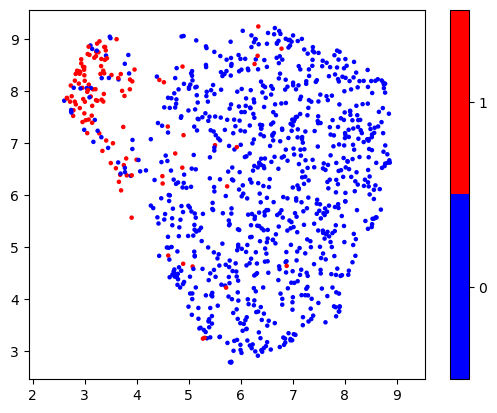

In [116]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=y,
    cmap='bwr',
    s=5
)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))


In [123]:
selected_indices = (embedding[:, 0] >= 3) & (embedding[:, 0] <= 4) & \
                   (embedding[:, 1] >= 8) & (embedding[:, 1] <= 9)
selected_data = X.loc[selected_indices]

In [124]:
print(f'Shape X {X.shape[0]}')
print(f'Shape y {y.shape[0]}')

Shape X 977
Shape y 977


In [126]:
selected_labels = y.loc[selected_indices]

In [127]:
selected_labels

16      True
30      True
64      True
98     False
101     True
105     True
128     True
174    False
176    False
272     True
316     True
326     True
329     True
349     True
366     True
376     True
378     True
386     True
388    False
410    False
445    False
490     True
497     True
517    False
576    False
627     True
657     True
663     True
669     True
682     True
683    False
701     True
711    False
725     True
795    False
864     True
869     True
880     True
907     True
928     True
951     True
960    False
961     True
Name: tnbc, dtype: bool

In [125]:
df[selected_indices]

,FYN,BRCA1,FOXC1,TBC1D1,LAG3,CDK6,GATA3,CCND1,PRR4,EPCAM,...,YES1,YOD1,TACSTD2,ROR1,PDCD1,SRC,DDX3X,MALAT1,tnbc,case_id
16,3169,1903,131,4432,73,1428,10,537,24,16153,...,5274,774,293,106,26,3194,18541,2173,True,a5b44d66-c162-46b5-9df2-86305f0385c5
30,708,542,3715,1972,434,2733,295,6773,6,6393,...,4685,806,8918,224,99,2816,8998,4136,True,eb2dbb4f-66b6-4525-8323-431970f7a64e
64,1741,829,4522,4114,376,6202,1442,15625,7,6345,...,3340,1009,18691,336,212,2386,16287,4239,True,18d35983-ea6a-4b70-a209-9bef37595956
98,4643,1167,1777,7892,804,3261,865,3893,10,5684,...,5147,1145,942,1106,265,3226,25731,8981,False,c836951b-3ffb-4e20-8504-0eccb7d50dd4
101,728,754,2823,4313,120,3105,1911,840,0,20163,...,2010,2864,796,96,44,3427,12994,4989,True,C72CB184-462D-4009-9CDB-848782FF8A76
105,2643,567,4639,6378,508,1205,464,9332,17,4663,...,2483,581,16891,453,146,6301,16741,4624,True,DEBA32E4-0E68-4711-941B-3B63BD965AFB
128,1561,669,3760,3866,74,7909,2190,10463,35,34029,...,6756,1211,13301,1834,54,2560,24096,6781,True,5ed024e8-d05e-4c65-9441-eda9930ccc82
174,927,1298,5476,4448,234,879,2335,1535,3,5271,...,6138,780,1273,124,72,4088,17352,10121,False,72e486b8-a866-4916-b2e4-8b4bb5dcd92d
176,1173,683,846,2273,1390,1490,2698,4043,8,5331,...,1765,701,5442,312,147,1995,14771,3270,False,59bf0ce4-715a-4017-bccb-c59916e78324
272,839,609,1799,2447,4281,2083,162,5383,11,9517,...,3841,841,13021,72,295,4126,8421,2784,True,8183F0FB-2303-4D7B-BCCD-55E5031FC7DF


In [99]:
selected_labels = y.loc[selected_indices]

In [100]:
selected_labels

16      True
30      True
64      True
98     False
101     True
105     True
128     True
174    False
176    False
272     True
316     True
326     True
329     True
349     True
366     True
376     True
378     True
386     True
388    False
410    False
445    False
490     True
497     True
517    False
576    False
627     True
657     True
663     True
669     True
682     True
683    False
701     True
711    False
725     True
795    False
864     True
869     True
880     True
907     True
928     True
951     True
960    False
961     True
Name: tnbc, dtype: bool

In [90]:
selected_data.index.tolist()

[16,
 30,
 64,
 98,
 101,
 105,
 128,
 174,
 176,
 272,
 316,
 326,
 329,
 349,
 366,
 376,
 378,
 386,
 388,
 410,
 445,
 490,
 497,
 517,
 576,
 627,
 657,
 663,
 669,
 682,
 683,
 701,
 711,
 725,
 795,
 864,
 869,
 880,
 907,
 928,
 951,
 960,
 961]

In [97]:
df[df.index.isin(selected_data.index.tolist())]

,FYN,BRCA1,FOXC1,TBC1D1,LAG3,CDK6,GATA3,CCND1,PRR4,EPCAM,...,YES1,YOD1,TACSTD2,ROR1,PDCD1,SRC,DDX3X,MALAT1,tnbc,case_id
16,3169,1903,131,4432,73,1428,10,537,24,16153,...,5274,774,293,106,26,3194,18541,2173,True,a5b44d66-c162-46b5-9df2-86305f0385c5
30,708,542,3715,1972,434,2733,295,6773,6,6393,...,4685,806,8918,224,99,2816,8998,4136,True,eb2dbb4f-66b6-4525-8323-431970f7a64e
64,1741,829,4522,4114,376,6202,1442,15625,7,6345,...,3340,1009,18691,336,212,2386,16287,4239,True,18d35983-ea6a-4b70-a209-9bef37595956
98,4643,1167,1777,7892,804,3261,865,3893,10,5684,...,5147,1145,942,1106,265,3226,25731,8981,False,c836951b-3ffb-4e20-8504-0eccb7d50dd4
101,728,754,2823,4313,120,3105,1911,840,0,20163,...,2010,2864,796,96,44,3427,12994,4989,True,C72CB184-462D-4009-9CDB-848782FF8A76
105,2643,567,4639,6378,508,1205,464,9332,17,4663,...,2483,581,16891,453,146,6301,16741,4624,True,DEBA32E4-0E68-4711-941B-3B63BD965AFB
128,1561,669,3760,3866,74,7909,2190,10463,35,34029,...,6756,1211,13301,1834,54,2560,24096,6781,True,5ed024e8-d05e-4c65-9441-eda9930ccc82
174,927,1298,5476,4448,234,879,2335,1535,3,5271,...,6138,780,1273,124,72,4088,17352,10121,False,72e486b8-a866-4916-b2e4-8b4bb5dcd92d
176,1173,683,846,2273,1390,1490,2698,4043,8,5331,...,1765,701,5442,312,147,1995,14771,3270,False,59bf0ce4-715a-4017-bccb-c59916e78324
272,839,609,1799,2447,4281,2083,162,5383,11,9517,...,3841,841,13021,72,295,4126,8421,2784,True,8183F0FB-2303-4D7B-BCCD-55E5031FC7DF


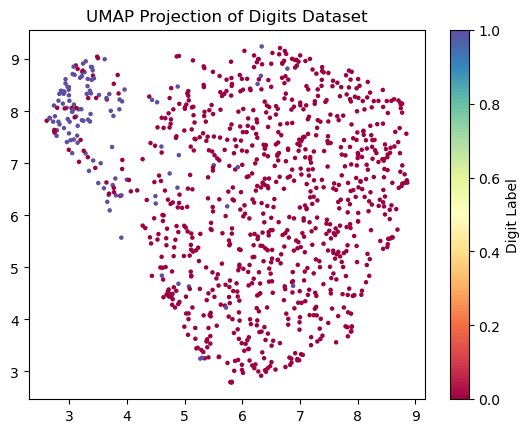

In [37]:
# Plot the results
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=5)
plt.colorbar(label='Digit Label')
plt.title('UMAP Projection of Digits Dataset')
plt.show()

In [39]:
sns.pairplot(X_log)


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000015EDD5FC9A0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000015EE33BE2A0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [53]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [54]:
digits_df = pd.DataFrame(digits.data[:,1:11])
digits_df

,0,1,2,3,4,5,6,7,8,9
0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0
1,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0
3,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0
4,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1792,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0
1793,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0
1794,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0
1795,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0


In [58]:
reducer = umap.UMAP(random_state=42, n_jobs=1)
reducer.fit(digits.data)

UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [59]:
embedding = reducer.transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1797, 2)

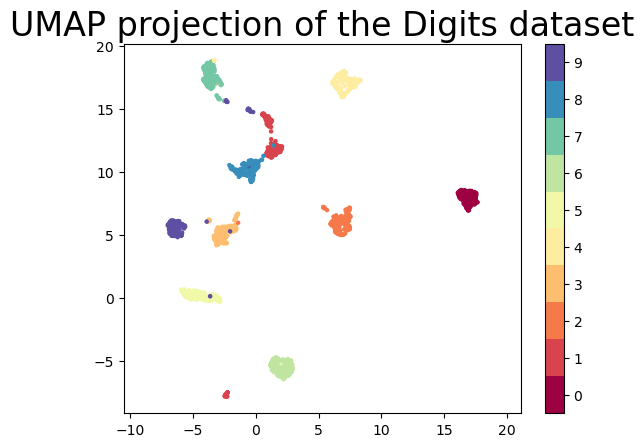

In [60]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [62]:
len(digits.target)

1797

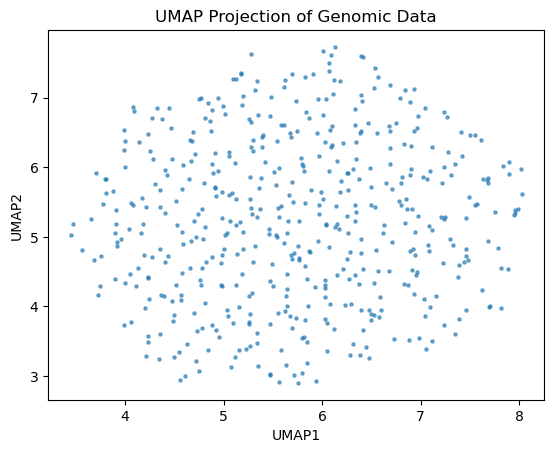

In [93]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Simulated gene expression dataset (cells x genes)
np.random.seed(42)
X = np.random.rand(500, 2000)  # 500 cells, 2000 genes

# Normalize gene expression values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='euclidean')
embedding = reducer.fit_transform(X_scaled)

# Visualize the embedding
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, alpha=0.6)
plt.title("UMAP Projection of Genomic Data")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

C:\Data\998_Software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


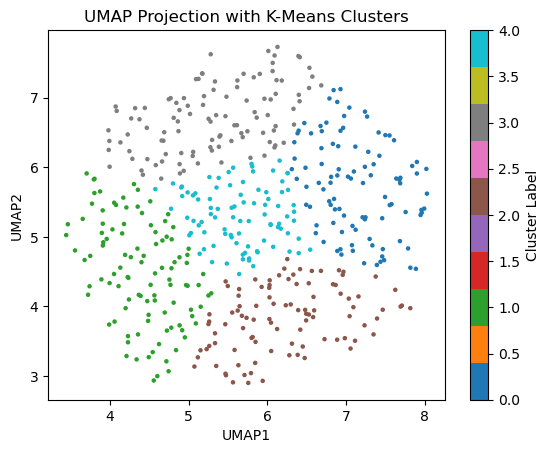

In [94]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
num_clusters = 5  # Adjust based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embedding)

# Visualize clusters
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', s=5)
plt.title("UMAP Projection with K-Means Clusters")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.colorbar(label="Cluster Label")
plt.show()

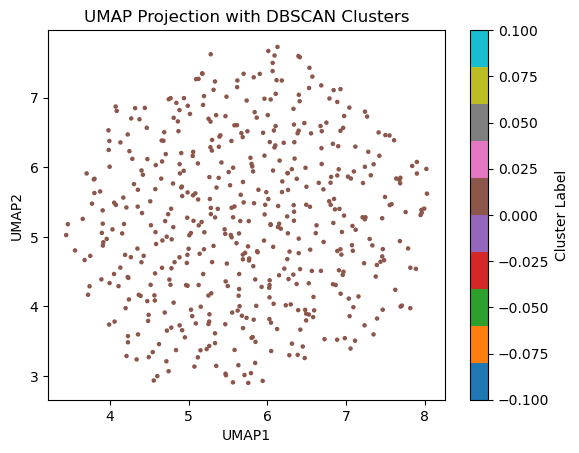

In [95]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10)  # Tune parameters based on dataset
labels = dbscan.fit_predict(embedding)

plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', s=5)
plt.title("UMAP Projection with DBSCAN Clusters")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.colorbar(label="Cluster Label")
plt.show()